In [44]:
library(linseed)

In [45]:
getwd()


[1] "/home/mooreank/linseed"

In [46]:
setwd('../../../')
setwd('/labshare/raph/eqtl/nabec/expression/')

In [47]:
nabec <- LinseedObject$new("nabec.dlpfc.tpms.gz", topGenes=10000)

File nabec.dlpfc.tpms.gz exists
Reading dataset from file nabec.dlpfc.tpms.gz
Make sure file is tab-separated and has row and column names
File successfully read


In [25]:
nabec

<LinseedObject>
  Public:
    calculatePairwiseLinearity: function (negToZero = T) 
    calculateSignificanceLevel: function (iters = 1000, spearmanThreshold = 0, retVal = F) 
    calculateSpearmanCorrelation: function () 
    cellTypeNumber: 6
    clone: function (deep = FALSE) 
    deconvolutionError: function (dataset = "filtered", error = "norm") 
    deconvolve: function (dataset = "filtered", error = "norm", method = "dsa", 
    deconvolveByEndpoints: function (dataset = "filtered", error = "norm") 
    distances: 0.07374071694824 0.073958411112514 0.0739116885966106 0. ...
    endpoints: 0.000125378719079048 0.000184840116815172 0.000183607989 ...
    endpointsProjection: -0.00101617616327794 -0.0731707639253621 0.0074767798864 ...
    exp: list
    filterDataset: function (geneSubset) 
    filterDatasetByPval: function (pval = 0.001) 
    genes: list
    hysime: function (dataset = "filtered", error = "norm", set = FALSE) 
    initialize: function (...) 
    markers: list
    n

In [ ]:
# ppmi2 <- LinseedObject$new("ppmi.v121018.transcripts.csv.gz", samples=10:42, topGenes=10000)

Sampling weights [===========================] 100% eta:  0s
Total number of genes is 10000
The number of genes after filtering is 2706


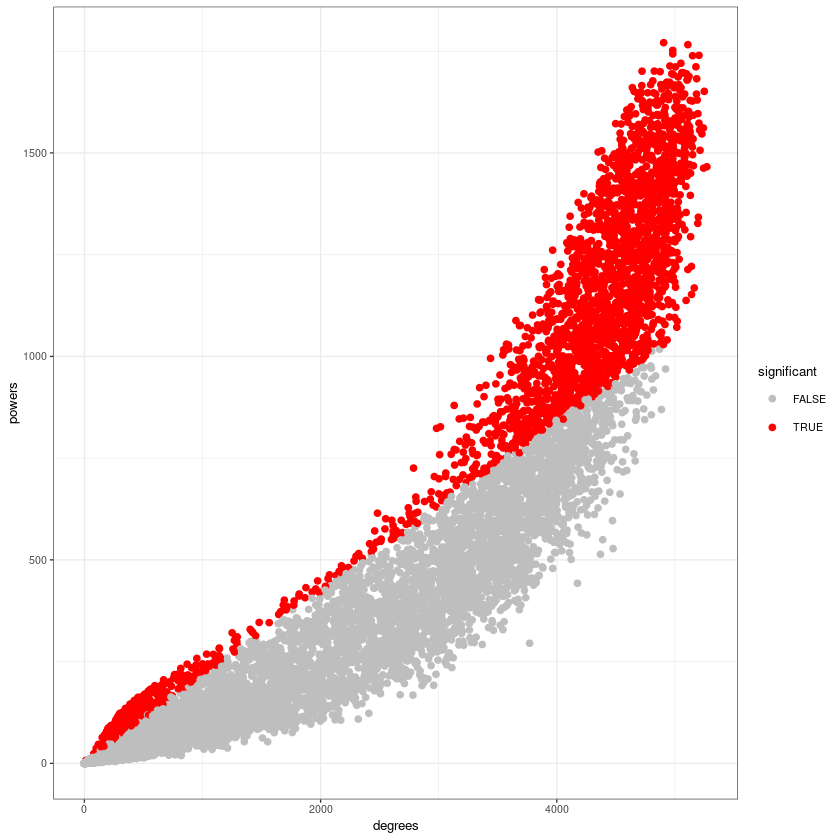

In [49]:
nabec$calculatePairwiseLinearity()
nabec$calculateSpearmanCorrelation()
nabec$calculateSignificanceLevel(100)
nabec$significancePlot(0.01)

nabec$filterDatasetByPval(0.01)

Warning message:
“Removed 492 rows containing missing values (geom_point).”Warning message:
“Removed 492 rows containing missing values (geom_path).”

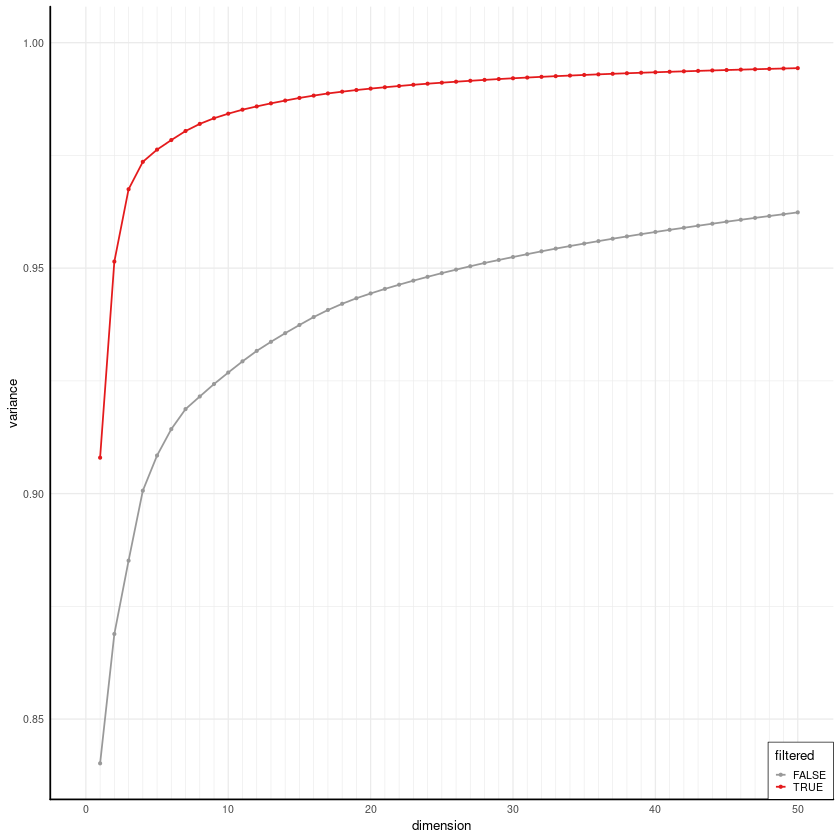

In [50]:
nabec$svdPlot()
##determine numberof cell types by #of dimension elbow occurs at

In [68]:
##visualize after filtering, projection plot
nabec$setCellTypeNumber(5)
# ppmi$project("full") # projecting full dataset
# ppmi$projectionPlot(color="filtered")

In [69]:
##deconvolution
nabec$project("filtered")
nabec$smartSearchCorners(dataset="filtered", error="norm")

Final vector is 


5 6 7 4 7

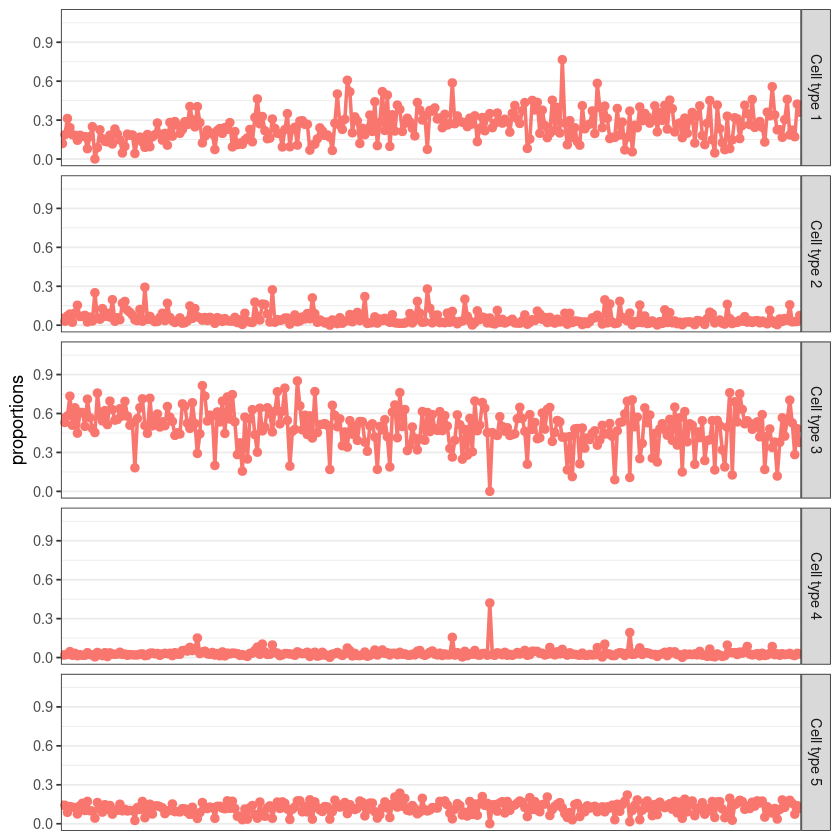

In [70]:

## 
nabec$deconvolveByEndpoints()
plotProportions(nabec$proportions)

In [71]:
tail(nabec$proportions)

,KEN.1003,KEN.1066,KEN.1069,KEN.1070,KEN.1092,KEN.1095,KEN.1103,KEN.1106,KEN.1127,KEN.1131,⋯,UMARY.72,UMARY.794,UMARY.813,UMARY.814,UMARY.818,UMARY.819,UMARY.871,UMARY.879,UMARY.914,UMARY.933
Cell type 1,0.11912433,0.18797262,0.31273903,0.24252234,0.18745359,0.18238052,0.14417685,0.18354288,0.17417914,0.17281195,⋯,0.224358666,0.22636859,0.16699034,0.30371612,0.46018402,0.18569291,0.22301804,0.17143378,0.42381326,0.35988925
Cell type 2,0.05285731,0.03012311,0.07078034,0.08632311,0.02212473,0.09344862,0.15392781,0.06664118,0.06894117,0.07603305,⋯,0.003739317,0.04893589,0.02849378,0.05204650,0.03746897,0.15743765,0.02586710,0.02759999,0.02851439,0.07506667
Cell type 3,0.56309515,0.53050231,0.58131090,0.73402954,0.50905199,0.64459592,0.44833667,0.60920808,0.60801008,0.50077542,⋯,0.118085094,0.37783006,0.56735952,0.42545710,0.55219264,0.70337883,0.52780336,0.28306738,0.48326033,0.37666204
Cell type 4,0.01990698,0.02003793,0.02483370,0.04609534,0.01735558,0.03283231,0.01360753,0.02241313,0.01720370,0.01724216,⋯,0.029481968,0.01740035,0.03002628,0.02234146,0.02571969,0.03266578,0.01983151,0.01488220,0.03304876,0.02656855
Cell type 5,0.14282524,0.14258832,0.08739785,0.13263151,0.12741930,0.12505366,0.07510896,0.13786404,0.15775667,0.10138980,⋯,0.035829642,0.10992404,0.18373308,0.12572435,0.16293149,0.18101217,0.15721000,0.07328100,0.13947839,0.11774047


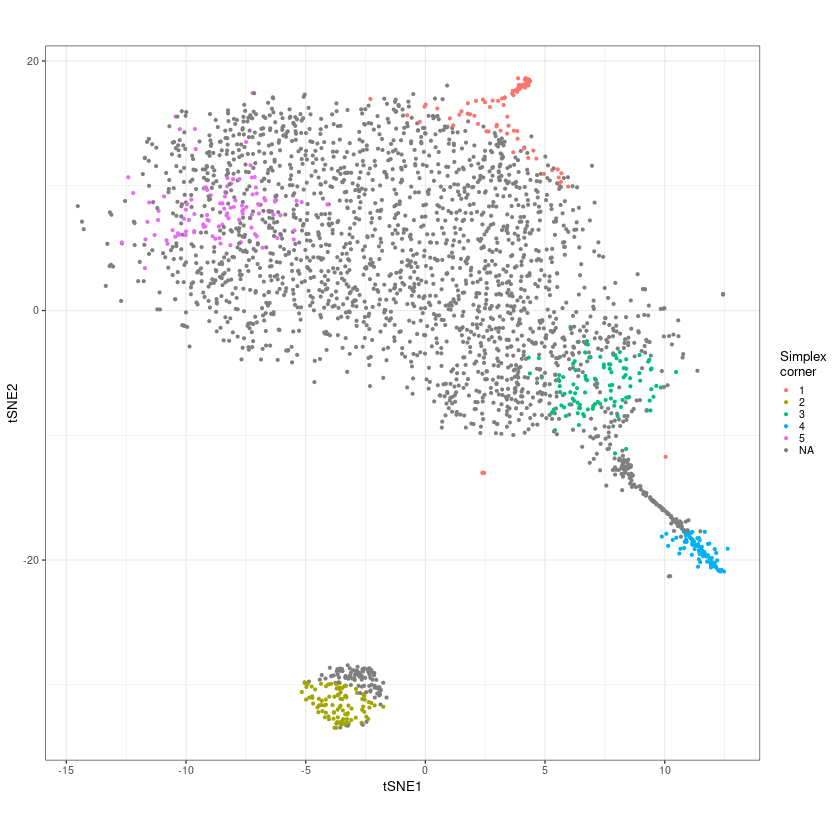

In [72]:
# lets select 100 genes closest to the simplex corners 
##tsne
nabec$selectGenes(100)
nabec$tsnePlot()

In [40]:
getwd()

[1] "/home/mooreank/linseed"

In [39]:
setwd('../../../../../')
setwd('home/mooreank/linseed')

In [41]:
genes <- data.frame(rosmap$selectGenes(100))
write.csv(genes, "rosmap_4cell_genes.csv")

In [73]:
head(genes)

X1,X2,X3,X4
<fct>,<fct>,<fct>,<fct>
ENST00000356264.6,ENST00000309594.4,ENST00000285518.10,ENST00000409476.5
ENST00000328257.12,ENST00000274137.9,ENST00000456936.3,ENST00000341541.7
ENST00000313683.14,ENST00000344417.9,ENST00000341285.7,ENST00000370542.1
ENST00000239940.11,ENST00000441788.6,ENST00000283131.3,ENST00000513238.5
ENST00000566012.1,ENST00000395176.2,ENST00000264710.4,ENST00000347063.8
ENST00000447467.6,ENST00000358022.4,ENST00000299957.10,ENST00000355849.9


In [43]:
genes['X1']

X1
<fct>
ENST00000356264.6
ENST00000328257.12
ENST00000313683.14
ENST00000239940.11
ENST00000566012.1
ENST00000447467.6
ENST00000562924.5
ENST00000373243.6
ENST00000435891.5


In [43]:
100genes <- read.csv('ppmi_6cell_genes.csv')


genes1 <- as.vector(genes['X1'])
#genes1_list <- genes1
genes2 <- as.vector(genes['X2'])
#genes2_list <- genes2
genes3 <- as.vector(genes['X3'])
#genes3_list <- genes3
genes4 <- as.vector(genes['X4'])
#genes4_list <- genes4
genes5 <- as.vector(genes['X5'])
#genes5_list <- genes5
genes6 <- as.vector(genes['X6'])
#genes6_list <- genes6

# genes1['gene_name'] = ''
# genes2['gene_name'] = ''
# genes3['gene_name'] = ''
# genes4['gene_name'] = ''
# genes5['gene_name'] = ''
# genes6['gene_name'] = ''

